In [52]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
movies = pd.read_csv("mymoviedb.csv", lineterminator = "\n")

In [56]:
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [60]:
# THE RELEASE_DATE COLUMN HAS TO BE CAST INTO THE DATE TIME AND TO EXTRACT THE YEAR ONLY.

movies['Release_Date'] = pd.to_datetime(movies['Release_Date']) 

In [62]:
print(movies['Release_Date'].dtypes)

datetime64[ns]


In [64]:
movies['Release_Date'] = movies['Release_Date'].dt.year

In [66]:
movies['Release_Date'].dtypes

dtype('int32')

In [68]:
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [70]:
# OVERVIEW, ORIGINAL_LANGUAGE, AND Poster_Url ARE NOT USEFUL DURING THE ANALYSIS, SO WE DROP THEM.

movies.drop(columns = ['Overview','Original_Language','Poster_Url'],inplace = True)

In [72]:
movies.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [74]:
# VOTE AVERAGE BETTER BE CATEGORIZED FOR BETTER ANALYSIS.
#conver the vote_average based on the populartiy likes (not_popular, Below_average, Average, Popular)

def categorize_col(movies, col, labels):
    edges = [movies[col].describe()['min'],
             movies[col].describe()['25%'],
             movies[col].describe()['50%'],
             movies[col].describe()['75%'],
             movies[col].describe()['max']
             ]
    movies[col] = pd.cut(movies[col],edges, labels = labels, duplicates = "drop" )
    return movies

labels = ['Not Popular',' Below Average', 'Average', 'Popular']
categorize_col(movies, 'Vote_Average', labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not Popular,Horror
9824,2016,The Offering,13.355,94,Not Popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [76]:
# GENRE COLUMN HAS A COMMA SEPARATED VALUE AND WHILE WHITESPACE THAT NEED TO BE HANDLED AND CAST INTO THE CATEGORY

movies['Genre'] = movies['Genre'].str.split(", ")
movies = movies.explode("Genre").reset_index(drop = True)

movies.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [80]:
sns.set_style("whitegrid")

Text(0.5, 1.0, 'genre column description')

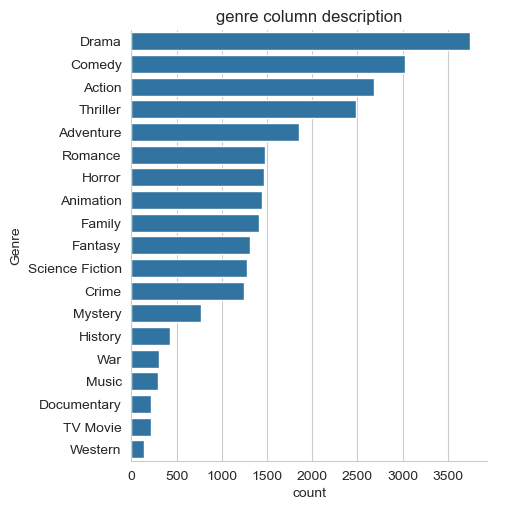

In [86]:
# MOST FREQUENT GENRE OF MOVIES RELEASED ON NETFLIX

sns.catplot(y = 'Genre' , data = movies , kind = "count", order = movies["Genre"].value_counts().index )
plt.title("genre column description")

In [106]:
# WHAT GENRE HAS THE HIGHEST VOTES

movies.loc[movies['Vote_Count'] == movies['Vote_Count'].max(),['Genre','Vote_Count']].reset_index(drop = True).set_index('')

,Vote_Count
Genre,
Action,31077
Science Fiction,31077
Adventure,31077


In [112]:
# WHAT MOVIES GOT THE HIGHEST POPULARITY? What's THEIR GENRE
movies.loc[movies['Popularity'] == movies['Popularity'].max(),['Title','Genre','Vote_Count']].reset_index(drop = True)


,Title,Genre,Vote_Count
0,Spider-Man: No Way Home,Action,8940
1,Spider-Man: No Way Home,Adventure,8940
2,Spider-Man: No Way Home,Science Fiction,8940


In [114]:
# WHAT MOVIES GOT THE MINIMUM POPULARITY? What's THEIR GENRE
movies.loc[movies['Popularity'] == movies['Popularity'].min(),['Title','Genre','Vote_Count']].reset_index(drop = True)

,Title,Genre,Vote_Count
0,The United States vs. Billie Holiday,Music,152
1,The United States vs. Billie Holiday,Drama,152
2,The United States vs. Billie Holiday,History,152
3,Threads,War,186
4,Threads,Drama,186
5,Threads,Science Fiction,186


Text(0.5, 1.0, 'year wise movies release count')

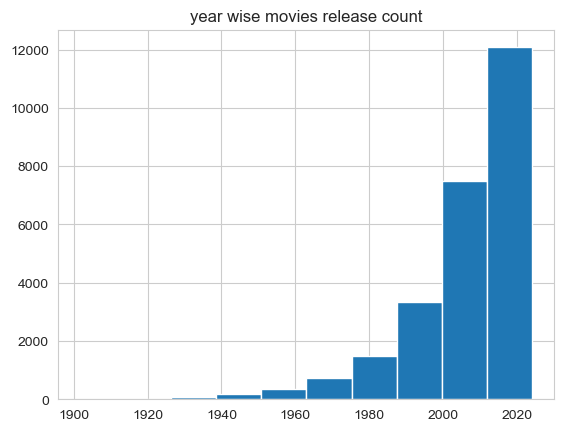

In [118]:
# WHICH YEAR HAS THE MOST FILMED MOVIES

movies['Release_Date'].hist()
plt.title('year wise movies release count')

In [ ]:
# summery

The highest number of movies is released from the drama genre.
The action, science fiction, and adventure movies have the highest vote count.
Spider-Man: No Way Home is the most popular movie, and The United States vs. Billie Holiday and Threads are the least.
Most movies are  between 2000 - 2020
